In [526]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
plt.rcParams['text.usetex'] = True
plt.rcParams.update({
    "text.usetex": True,              # Use TeX for text rendering
    "font.family": "serif",
    "hatch.color": "white"
})


In [565]:
with open('../results/sentiment_faithfulness_1738291318 (1).pkl', 'rb') as f:
    sentiment_faithfulness2 = pickle.load(f)

In [566]:
sentiment_faithfulness2['samples'][:,.shape

SyntaxError: invalid syntax (938961038.py, line 1)

In [567]:
from numpy import float128

ImportError: cannot import name 'float128' from 'numpy' (/Users/landonb/PycharmProjects/spectral-explain/.venv/lib/python3.10/site-packages/numpy/__init__.py)

In [569]:
b = np.float64(sentiment_faithfulness2['samples'][:,0]) / np.array(np.float64(np.power(2.0,np.array(pd.read_csv('../../data/sentiment.csv')['n']))), dtype='object')

/var/folders/sn/f92pphw96kq4t8ml1sx9nch00000gq/T/ipykernel_6039/4144490602.py:1: RuntimeWarning: overflow encountered in power
  b = np.float64(sentiment_faithfulness2['samples'][:,0]) / np.array(np.float64(np.power(2.0,np.array(pd.read_csv('../../data/sentiment.csv')['n']))), dtype='object')


In [570]:
b

array([0.84375, 0.0372314453125, 0.0418701171875, 0.085693359375,
       0.85546875, 0.505859375, 0.0166015625, 0.5595703125, 0.4794921875,
       0.01593017578125, 0.51953125, 0.73828125, 0.00946044921875,
       0.096435546875, 0.083740234375, 0.2802734375, 0.84765625,
       0.84765625, 0.568359375, 0.01837158203125, 0.0004367828369140625,
       1.1920928955078125e-05, 1.3828277587890625e-05,
       1.4230608940124512e-06, 3.91155481338501e-07,
       9.592622518539429e-08, 8.754432201385498e-08, 0.0038604736328125,
       5.030632019042969e-05, 1.6391277313232422e-06,
       3.632158041000366e-07, 8.42846930027008e-08, 6.556510925292969e-07,
       2.6941299438476562e-05, 9.173527359962463e-08,
       8.307397365570068e-07, 1.2934207916259766e-05,
       7.525086402893066e-07, 3.501772880554199e-07,
       0.0002193450927734375, 3.802513859341161e-15,
       2.842170943040401e-14, 3.934837877750397e-08,
       2.2351741790771484e-08, 2.255140518769849e-16,
       2.330580173293128

In [531]:
import pandas as pd
np.power(2.0,np.array(pd.read_csv('../../data/sentiment.csv')['n'])).shape

/var/folders/sn/f92pphw96kq4t8ml1sx9nch00000gq/T/ipykernel_6039/2639906881.py:2: RuntimeWarning: overflow encountered in power
  np.power(2.0,np.array(pd.read_csv('../../data/sentiment.csv')['n'])).shape


(160,)

In [571]:
for i in range(8):
    print(np.mean(b[20*i : 20*(i+1)]))

0.3725616455078125
0.00023196488618850707
3.1445335785989028e-09
2.1997446689549006e-19
1.403122443545915e-38
5.48436763600685e-78
2.027736386295056e-155
0.0


In [533]:
# pickle load file into dict
with open('../results/sentiment/sentiment_faithfulness_2.pkl', 'rb') as f:
    sentiment_faithfulness = pickle.load(f)

with open('../results/sentiment/sentiment_subtract_small.pkl', 'rb') as f:
    sentiment_subtraction_results = pickle.load(f)

with open('../results/sentiment/sentiment_subtract_large.pkl', 'rb') as f:
    sentiment_large_subtraction_results = pickle.load(f)

with open('../results/sentiment/sentiment_mini_interactions_5.pkl', 'rb') as f:
    sentiment_recall_results = pickle.load(f)

In [550]:
color_dict = {'qsft_hard_0': '#896190',
               'qsft_soft_0': '#896190',
               'lime_0': '#86a76c',
               'linear_1': '#37537c',
               'linear_2': '#697fa0',
               'linear_3': '#9aa9c4',
               'linear_4': '#cad6e9',
               'faith_banzhaf_1': '#37537c',
               'faith_banzhaf_2': '#697fa0',
               'faith_banzhaf_3': '#9aa9c4',
               'faith_banzhaf_4': '#cad6e9',
               'faith_shapley_1': '#96474A',
               'faith_shapley_2': '#B2746B',
               'faith_shapley_3': '#CFA08C',
               'faith_shapley_4': '#EBCDAD',
               'shapley_taylor_2': '#b0702b',
               'shapley_taylor_3': '#dba66d',
               'shapley_taylor_4': '#e4bc93',
               }
name_dict = {'qsft_hard_0': 'SpectralExplain',
               'qsft_soft_0': 'SpectralExplain',
               'lime_0': 'LIME',
               'faith_banzhaf_1': 'Banzhaf',
               'faith_banzhaf_2': 'Faith-Banzhaf 2nd Order',
               'faith_banzhaf_3': 'Faith-Banzhaf 3rd Order',
               'faith_banzhaf_4': 'Faith-Banzhaf 4th Order',
               'faith_shapley_1': 'Shapley',
               'faith_shapley_2': 'Faith-Shap 2nd Order',
               'faith_shapley_3': 'Faith-Shap 3rd Order',
               'faith_shapley_4': 'Faith-Shap 4th Order',
               'shapley_taylor_2': 'Shapley-Taylor 2nd Order',
               'shapley_taylor_3': 'Shapley-Taylor 3rd Order',
               'shapley_taylor_4': 'Shapley-Taylor 4th Order',
               }

groups = ['8-15', '16-31', '32-63', '64-127', '128-255', '256-511', '512-1023', '1024-2047']

# Faithfulness

## Sentiment Analysis

### Fixed Samples, $B=8$

In [551]:
sentiment_faithfulness['methods'].keys()

dict_keys(['linear_1', 'linear_2', 'linear_3', 'linear_4', 'faith_shapley_1', 'faith_shapley_2', 'faith_shapley_3', 'faith_shapley_4', 'shapley_taylor_1', 'shapley_taylor_2', 'shapley_taylor_3', 'shapley_taylor_4', 'shapley_0', 'banzhaf_0', 'lime_0', 'qsft_hard_0', 'qsft_soft_0', 'faith_banzhaf_1', 'faith_banzhaf_2', 'faith_banzhaf_3', 'faith_banzhaf_4'])

<Figure size 640x480 with 0 Axes>

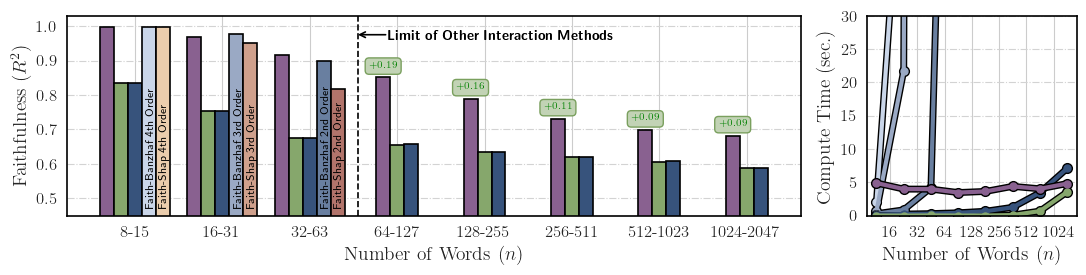

In [552]:
best_methods = ['qsft_hard_0', 'lime_0', 'faith_banzhaf_1', 'faith_banzhaf_4', 'faith_shapley_1']
methods_per_group = [5,5,5,3,3,3,3,3]
plt.clf()
groups = ['8-15', '16-31', '32-63', '64-127', '128-255', '256-511', '512-1023', '1024-2047']

fig, (ax1,ax2) = plt.subplots(1,2, width_ratios=[3.5, 1], figsize=(11, 2.85))
ax1.grid(True, axis='y', color="lightgray", linewidth="0.8", linestyle="-.")
ax2.grid(True, axis='y', zorder=3, color="lightgray", linewidth="0.8", linestyle="-.")

x = np.arange(8)
width = 0.8 / len(best_methods)  # Adjust the width to fit all bars without overlap

sentiment_faithfulness_results = np.zeros((len(best_methods), 8))
for i, method in enumerate(best_methods):
    shifts = np.zeros(8)
    colors = []
    for j in range(8):
        if 'faith_banzhaf' in method and method != 'faith_banzhaf_1' and j < 3:
            method = method[:-1] + str(4-j)
        elif 'faith_shapley' in method and j < 3:
            method = method[:-1] + str(4-j)
        colors.append(color_dict[method])
        sentiment_faithfulness_results[i, j] = np.mean(sentiment_faithfulness['methods'][method]['test_r2'][20 * j: 20 * (j + 1), 5])
        shifts[j] =  (i - (methods_per_group[j] - 1) / 2) * width
        method_name = name_dict[method].replace("\n", " ")
        if ('faith_banzhaf' in method or 'faith_shapley' in method) and method != 'faith_banzhaf_1' and not np.isnan(sentiment_faithfulness_results[i, j]):
            ax1.text(x[j]+shifts[j]-0.04, 0.47, rf"\textsf{{{method_name}}}",
                            ha='left', va='bottom', fontsize=8, color='black',  rotation=90)

    ax1.bar(x + shifts, sentiment_faithfulness_results[i, :], width, color=colors, ecolor='black', edgecolor='black',
           linewidth=1.2, zorder=2)


for i, method in enumerate(['qsft_hard_0', 'lime_0', 'faith_banzhaf_1', 'faith_banzhaf_2', 'faith_banzhaf_3', 'faith_banzhaf_4',]):
    time_taken = []
    for j in range(8):
        if method == 'faith_banzhaf_2' and j == 3:
            time_taken.append(151)
        elif method == 'faith_banzhaf_3' and j == 2:
            time_taken.append(1000)
        elif method == 'faith_banzhaf_4' and j == 1:
            time_taken.append(60)
        else:
            time_taken.append(np.mean(sentiment_faithfulness['methods'][method]['time'][20 * j: 20 * (j + 1), 5]))
    ax2.plot(x+1, time_taken, color='black', linewidth=5, marker='o', markersize=7, zorder=2.4-0.1*i)
    ax2.plot(x+1, time_taken, color=color_dict[method], linewidth=3, marker='o', markersize=5, zorder=2.5-0.1*i)


for j in range(3,8):
    spectral_explain_value = sentiment_faithfulness_results[0, j]
    lime_value = sentiment_faithfulness_results[2, j]
    ax1.text(j-(width), spectral_explain_value + 0.02, f"+{spectral_explain_value - lime_value:.2f}",
        ha='center', va='bottom', fontsize=7, color='green', bbox=dict(facecolor='#c2d3b5', edgecolor='#7aa05e', boxstyle='round,pad=0.4'))

for ax in [ax1, ax2]:
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1.2)  # Optional: Adjust thickness

ax1.set_ylim(.45, 1.03)
ax1.set_xlabel("Number of Words ($n$)", fontsize=14)
ax1.set_ylabel("Faithfulness ($R^2$)", fontsize=14)
ax1.set_xticks(np.arange(8), groups,fontsize=12)
ax1.set_yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0],[0.5, 0.6, 0.7, 0.8, 0.9, 1.0],fontsize=12)
# Adding a vertical line between the third and fourth groups
ax1.axvline(x=2.55, color='black', linestyle='--', linewidth=1.2, zorder=3)
ax1.text(2.9, 0.97, r"\textsf{\textbf{Limit of Other Interaction Methods}}", fontsize=10, color='black',
         ha='left', va='center')
ax1.annotate(
    '',
    xy=(2.52, 0.975),  # The point on the dotted line (x, y)
    xytext=(2.9, 0.975),  # The position of the "Frontier of Interactions" text (x, y)
    arrowprops=dict(facecolor='black', edgecolor='black', arrowstyle='->', lw=1.2, zorder=3)
)

ax2.set_ylim(0,30)
ax2.set_yticks([0,5,10,15,20,25,30], [0,5,10,15,20,25,30],fontsize=12)
ax2.set_xlabel("Number of Words ($n$)", fontsize=14)
ax2.set_ylabel("Compute Time (sec.)", fontsize=14)
ax2.set_xticks(np.arange(2, 9) - 0.5)  # Set tick positions
ax2.set_xticklabels(['16', '32', '64', '128', '256', '512', '1024'], rotation=0, ha='center', fontsize=12)
import matplotlib.transforms as mtrans
# ...
trans = mtrans.Affine2D().translate(6, 0)
for t in [list(ax.get_xticklabels())[-1]]:
    t.set_transform(t.get_transform()+trans)
ax1.axhspan(3, 5, facecolor='b', alpha=0.5)
fig.tight_layout()
plt.savefig('sentiment_faithfulness_fixed2.pdf', dpi=400, bbox_inches='tight')
plt.show()

In [413]:
# pickle load file into dict
with open('../results/drop_faith_4.pkl', 'rb') as f:
    drop_4_faithfulness = pickle.load(f)

with open('../results/drop_faith_6.pkl', 'rb') as f:
    drop_6_faithfulness = pickle.load(f)

with open('../results/drop_faith_8.pkl', 'rb') as f:
    drop_8_faithfulness = pickle.load(f)

with open('../results/hotpotqa_faith_4.pkl', 'rb') as f:
    hotpot_4_faithfulness = pickle.load(f)

with open('../results/hotpotqa_faith_6.pkl', 'rb') as f:
    hotpot_6_faithfulness = pickle.load(f)

with open('../results/hotpotqa_faith_8.pkl', 'rb') as f:
    hotpot_8_faithfulness = pickle.load(f)


<Figure size 640x480 with 0 Axes>

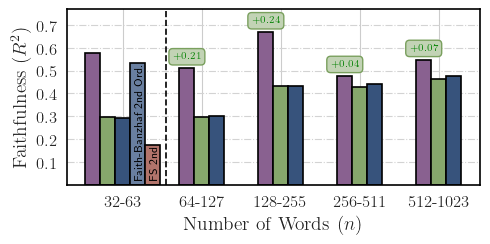

In [553]:
all_methods = ['qsft_soft_0', 'lime_1', 'faith_banzhaf_1', 'faith_banzhaf_2', 'FSII_2']
groups = list(drop_8_faithfulness.keys())
methods_per_group = [['qsft_soft_0', 'lime_1', 'faith_banzhaf_1', 'faith_banzhaf_2', 'FSII_2'],
                     ['qsft_soft_0', 'lime_1', 'faith_banzhaf_1'],
                     ['qsft_soft_0', 'lime_1', 'faith_banzhaf_1'],
                     ['qsft_soft_0', 'lime_1', 'faith_banzhaf_1'],
                     ['qsft_soft_0', 'lime_1', 'faith_banzhaf_1'],]
plt.clf()
colors = ['#896190', '#86a76c', '#37537c', '#697fa0', '#B2746B']
fig, ax1 = plt.subplots(figsize=(5, 2.55))
ax1.grid(True, axis='y', color="lightgray", linewidth="0.8", linestyle="-.")

x = np.arange(5)
width = 0.95 / len(all_methods)  # Adjust the width to fit all bars without overlap

sentiment_faithfulness_results = np.zeros((len(all_methods), 5))
for i, method in enumerate(all_methods):
    shifts = np.zeros(5)
    for j, g in enumerate(list(drop_8_faithfulness.keys())):
        sentiment_faithfulness_results[i, j] = drop_8_faithfulness[g][method]
        shifts[j] =  (i - (len(methods_per_group[j]) - 1) / 2) * width
        if ('faith_banzhaf' in method) and method != 'faith_banzhaf_1' and not np.isnan(sentiment_faithfulness_results[i, j]):
            ax1.text(x[j]+shifts[j]-0.04, 0.02, r"\textsf{{Faith-Banzhaf 2nd Ord.}}",
                            ha='left', va='bottom', fontsize=8, color='black',  rotation=90)
        elif ('FSII' in method) and not np.isnan(sentiment_faithfulness_results[i, j]):
            ax1.text(x[j]+shifts[j]-0.04, 0.02, r"\textsf{{FS 2nd}}",
                            ha='left', va='bottom', fontsize=8, color='black',  rotation=90)
    ax1.bar(x + shifts, sentiment_faithfulness_results[i, :], width, color=colors[i], ecolor='black', edgecolor='black',
           linewidth=1.2, zorder=2)

for j in range(1,5):
    spectral_explain_value = sentiment_faithfulness_results[0, j]
    lime_value = sentiment_faithfulness_results[2, j]
    ax1.text(j-(width), spectral_explain_value + 0.03, f"+{spectral_explain_value - lime_value:.2f}",
        ha='center', va='bottom', fontsize=7, color='green', bbox=dict(facecolor='#c2d3b5', edgecolor='#7aa05e', boxstyle='round,pad=0.4'))

for ax in [ax1, ax2]:
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1.2)  # Optional: Adjust thickness
ax1.axvline(x=0.55, color='black', linestyle='--', linewidth=1.2, zorder=3)
ax1.set_ylim(0, 0.77)
ax1.set_xlabel("Number of Words ($n$)", fontsize=14)
ax1.set_ylabel("Faithfulness ($R^2$)", fontsize=14)
ax1.set_xticks(np.arange(5), list(drop_8_faithfulness.keys()), fontsize=12)
ax1.set_yticks([0.1, 0.2,0.3,0.4,0.5,0.6,0.7],[0.1, 0.2,0.3,0.4,0.5,0.6,0.7], fontsize=12)

fig.tight_layout()
plt.savefig('drop_faithfulness_fixed2.pdf', dpi=400, bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>

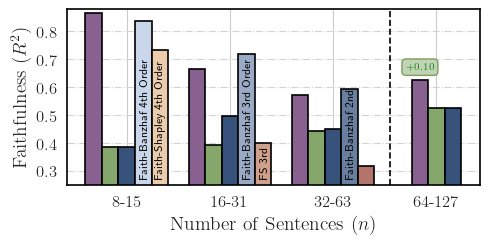

In [554]:
all_methods = ['qsft_soft_0', 'lime_1', 'faith_banzhaf_1', 'faith_banzhaf_4', 'FSII_4']
groups = list(hotpot_8_faithfulness.keys())
methods_per_group = [['qsft_soft_0', 'lime_1', 'faith_banzhaf_1', 'faith_banzhaf_4', 'FSII_4'],
                     ['qsft_soft_0', 'lime_1', 'faith_banzhaf_1', 'faith_banzhaf_3', 'FSII_3'],
                     ['qsft_soft_0', 'lime_1', 'faith_banzhaf_1', 'faith_banzhaf_2', 'FSII_2'],
                     ['qsft_soft_0', 'lime_1', 'faith_banzhaf_1']]
plt.clf()
colors = [['#896190', '#86a76c', '#37537c','#cad6e9', '#EBCDAD'],
          ['#896190', '#86a76c', '#37537c','#9aa9c4', '#CFA08C'],
          ['#896190', '#86a76c', '#37537c','#697fa0', '#B2746B'],
          ['#896190', '#86a76c','#37537c']]
fig, ax1 = plt.subplots(figsize=(5, 2.55))
ax1.grid(True, axis='y', color="lightgray", linewidth="0.8", linestyle="-.")

x = np.arange(4)
width = 0.8 / len(all_methods)  # Adjust the width to fit all bars without overlap

sentiment_faithfulness_results = np.zeros((len(all_methods), 4))
for i, method in enumerate(all_methods):
    shifts = np.zeros(4)
    for j, g in enumerate(list(hotpot_8_faithfulness.keys())):
        if 'faith_banzhaf' in method and method!= 'faith_banzhaf_1' and j < 3:
            method = 'faith_banzhaf_' + str((4-j))
        elif 'FSII' in method and j < 3:
            method = 'FSII_' + str((4-j))

        sentiment_faithfulness_results[i, j] = hotpot_8_faithfulness[g][method]
        if not np.isnan(sentiment_faithfulness_results[i, j]):
            shifts[j] =  (i - (len(methods_per_group[j]) - 1) / 2) * width
            ax1.bar(x[j] + shifts[j], sentiment_faithfulness_results[i, j], width, color=colors[j][i], ecolor='black', edgecolor='black',
                   linewidth=1.2, zorder=2)
            if method == 'faith_banzhaf_4':
                ax1.text(x[j]+shifts[j]-0.04, 0.27, r"\textsf{{Faith-Banzhaf 4th Order}}",
                                ha='left', va='bottom', fontsize=8, color='black',  rotation=90)
            elif method == 'faith_banzhaf_3':
                ax1.text(x[j]+shifts[j]-0.04, 0.27, r"\textsf{{Faith-Banzhaf 3rd Order}}",
                                ha='left', va='bottom', fontsize=8, color='black',  rotation=90)
            elif method == 'faith_banzhaf_2':
                ax1.text(x[j]+shifts[j]-0.04, 0.27, r"\textsf{{Faith-Banzhaf 2nd}}",
                                ha='left', va='bottom', fontsize=8, color='black',  rotation=90)
            elif method == 'FSII_4':
                ax1.text(x[j]+shifts[j]-0.04, 0.27, r"\textsf{{Faith-Shapley 4th Order}}",
                                ha='left', va='bottom', fontsize=8, color='black',  rotation=90)
            elif method == 'FSII_3':
                ax1.text(x[j]+shifts[j]-0.04, 0.27, r"\textsf{{FS 3rd}}",
                                ha='left', va='bottom', fontsize=8, color='black',  rotation=90)

for j in range(3,4):
    spectral_explain_value = sentiment_faithfulness_results[0, j]
    lime_value = sentiment_faithfulness_results[2, j]
    ax1.text(j-(width), spectral_explain_value + 0.03, f"+{spectral_explain_value - lime_value:.2f}",
        ha='center', va='bottom', fontsize=7, color='green', bbox=dict(facecolor='#c2d3b5', edgecolor='#7aa05e', boxstyle='round,pad=0.4'))

for ax in [ax1, ax2]:
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1.2)  # Optional: Adjust thickness
ax1.axvline(x=2.55, color='black', linestyle='--', linewidth=1.2, zorder=3)
ax1.set_ylim(0.25, .88)

ax1.set_xlabel("Number of Sentences ($n$)", fontsize=14)
ax1.set_ylabel("Faithfulness ($R^2$)", fontsize=14)
ax1.set_xticks(np.arange(4), list(hotpot_8_faithfulness.keys()), fontsize=12)
ax1.set_yticks([0.3,0.4,0.5,0.6,0.7,0.8],[0.3,0.4,0.5,0.6,0.7,0.8], fontsize=12)

fig.tight_layout()
plt.savefig('hotpot_faithfulness_fixed2.pdf', dpi=400, bbox_inches='tight')
plt.show()

In [555]:
all_methods = ['qsft_soft_0', 'lime_0', 'faith_banzhaf_1', 'faith_banzhaf_2', 'faith_banzhaf_3', 'faith_banzhaf_4', 'faith_shapley_1', 'faith_shapley_2','faith_shapley_3','faith_shapley_4','shapley_taylor_2', 'shapley_taylor_3','shapley_taylor_4']

sentiment_faithfulness_results = np.zeros((len(all_methods), 8))
for i, method in enumerate(all_methods):
    for j in range(8):
        sentiment_faithfulness_results[i, j] = np.mean(sentiment_faithfulness['methods'][method]['test_r2'][20 * j: 20 * (j + 1), 5])
np.savetxt("output.csv", sentiment_faithfulness_results.T, delimiter=",")

In [556]:
drop_8_faithfulness['32-63'].keys()

dict_keys(['qsft_soft_0', 'lime_1', 'faith_banzhaf_4', 'FSII_4', 'faith_banzhaf_3', 'FSII_3', 'faith_banzhaf_2', 'FSII_2', 'faith_banzhaf_1', 'SV_1', 'STII_2', 'STII_3', 'STII_4'])

In [557]:
all_methods = ['qsft_soft_0', 'lime_1', 'faith_banzhaf_1', 'faith_banzhaf_2', 'faith_banzhaf_3', 'faith_banzhaf_4',
               'SV_1', 'FSII_2', 'FSII_3', 'FSII_4', 'STII_2', 'STII_3', 'STII_4']

sentiment_faithfulness_results = np.zeros((len(all_methods), 5))
for i, method in enumerate(all_methods):
    for j, k in enumerate(drop_8_faithfulness.keys()):
        sentiment_faithfulness_results[i, j] = drop_8_faithfulness[k][method]
np.savetxt("drop.csv", sentiment_faithfulness_results.T, delimiter=",")

In [558]:
all_methods = ['qsft_soft_0', 'lime_1', 'faith_banzhaf_1', 'faith_banzhaf_2', 'faith_banzhaf_3', 'faith_banzhaf_4',
               'SV_1', 'FSII_2', 'FSII_3', 'FSII_4', 'STII_2', 'STII_3', 'STII_4']

sentiment_faithfulness_results = np.zeros((len(all_methods), 5))
for i, method in enumerate(all_methods):
    for j, k in enumerate(hotpot_8_faithfulness.keys()):
        sentiment_faithfulness_results[i, j] = hotpot_8_faithfulness[k][method]
np.savetxt("hotpot.csv", sentiment_faithfulness_results.T, delimiter=",")

In [559]:
all_methods = ['qsft_soft_0', 'lime_0', 'faith_banzhaf_1', 'faith_banzhaf_2', 'faith_banzhaf_3', 'faith_banzhaf_4', 'faith_shapley_1', 'faith_shapley_2','faith_shapley_3','faith_shapley_4','shapley_taylor_2', 'shapley_taylor_3','shapley_taylor_4']

sentiment_faithfulness_results = np.zeros((len(all_methods), 8))
for i, method in enumerate(all_methods):
    for j in range(8):
        sentiment_faithfulness_results[i, j] = np.mean(sentiment_faithfulness['methods'][method]['test_r2'][20 * j: 20 * (j + 1), 5])
np.savetxt("output.csv", sentiment_faithfulness_results.T, delimiter=",")

### Changing samples for bucket $n=16-31$, $B=4, 6, 8$

<Figure size 640x480 with 0 Axes>

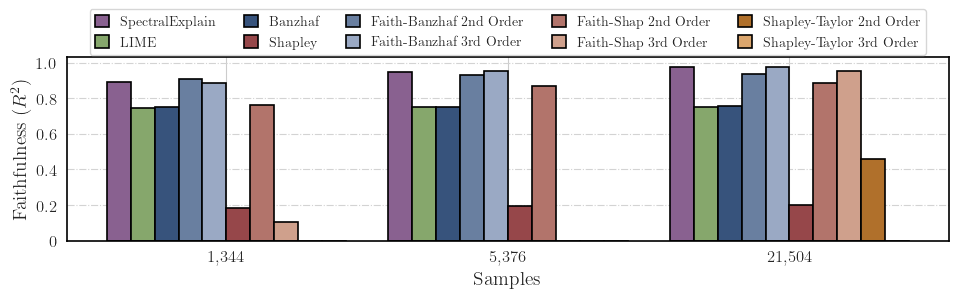

In [560]:
best_methods = ['qsft_soft_0', 'lime_0', 'faith_banzhaf_1', 'faith_banzhaf_2', 'faith_banzhaf_3', 'faith_shapley_1', 'faith_shapley_2', 'faith_shapley_3', 'shapley_taylor_2', 'shapley_taylor_3']
plt.clf()

fig, ax = plt.subplots(figsize=(10, 3.3))
plt.grid(True, axis='y', zorder=3, color="lightgray", linewidth="0.8", linestyle="-.")

x = np.arange(3)
width = 0.85 / len(best_methods)  # Adjust the width to fit all bars without overlap

sentiment_faithfulness_results = np.zeros((len(best_methods), 3))
for i, method in enumerate(best_methods):
    for idx_j, j in enumerate([1,3,5]):
        sentiment_faithfulness_results[i, idx_j] = np.mean(sentiment_faithfulness['methods'][method]['test_r2'][20:40, j])
    ax.bar(x + (i - (len(best_methods) - 1) / 2) * width, sentiment_faithfulness_results[i, :], width, color=color_dict[method], ecolor='black', edgecolor='black',linewidth=1.2, zorder=2, label=name_dict[method])

handles, labels = plt.gca().get_legend_handles_labels()
order = [0,1,2,5,3,4,6,7,8,9]

ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order],
          loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=len(best_methods)/2, fontsize=10, frameon=True, handlelength=1, handleheight=1)

for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.2)  # Optional: Adjust thickness
plt.ylim(0, 1.03)
plt.xlabel("Samples", fontsize=14)
plt.ylabel("Faithfulness ($R^2$)", fontsize=14)
plt.xticks(np.arange(3), ['1,344', '5,376', '21,504'], fontsize=12)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], [0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=12)
fig.tight_layout()
plt.savefig('sentiment_faithfulness_dynamic.pdf', dpi=400, bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>

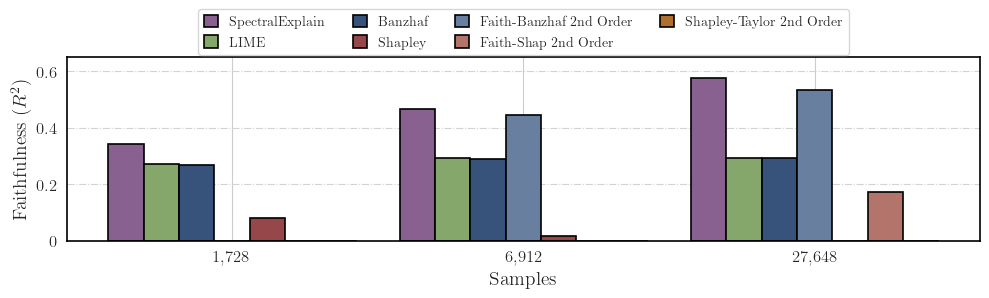

In [561]:
best_methods = ['qsft_soft_0', 'lime_0', 'faith_banzhaf_1', 'faith_banzhaf_2', 'faith_shapley_1', 'faith_shapley_2',  'shapley_taylor_2',]
plt.clf()
method_dict = {'faith_shapley_1': 'SV_1',
               'faith_shapley_2': 'FSII_2',
               'faith_shapley_3': 'FSII_3',
               'faith_shapley_4': 'FSII_4',
               'shapley_taylor_2': 'STII_2',
               'shapley_taylor_3': 'STII_3',
               'shapley_taylor_4': 'STII_4',
               'lime_0': 'lime_1'}

fig, ax = plt.subplots(figsize=(10, 3.3))
plt.grid(True, axis='y', zorder=3, color="lightgray", linewidth="0.8", linestyle="-.")

x = np.arange(3)
width = 0.85 / len(best_methods)  # Adjust the width to fit all bars without overlap

sentiment_faithfulness_results = np.zeros((len(best_methods), 3))
for i, method in enumerate(best_methods):
    for idx_j, result in enumerate([drop_4_faithfulness['32-63'], drop_6_faithfulness['32-63'], drop_8_faithfulness['32-63']]):
        sentiment_faithfulness_results[i, idx_j] = result[method_dict[method] if method not in result else method]
    ax.bar(x + (i - (len(best_methods) - 1) / 2) * width, sentiment_faithfulness_results[i, :], width, color=color_dict[method], ecolor='black', edgecolor='black',linewidth=1.2, zorder=2, label=name_dict[method])

handles, labels = plt.gca().get_legend_handles_labels()
order = [0,1,2,4,3,5,6]

ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order],
          loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=len(best_methods)/2 + 1, fontsize=10, frameon=True, handlelength=1, handleheight=1)

for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.2)  # Optional: Adjust thickness
plt.ylim(0, .65)
plt.xlabel("Samples", fontsize=14)
plt.ylabel("Faithfulness ($R^2$)", fontsize=14)
plt.xticks(np.arange(3), ['1,728', '6,912', '27,648'], fontsize=12)
plt.yticks([0, 0.2, 0.4, 0.6],[0, 0.2, 0.4, 0.6], fontsize=12)
fig.tight_layout()
plt.savefig('drop_faithfulness_dynamic.pdf', dpi=400, bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>

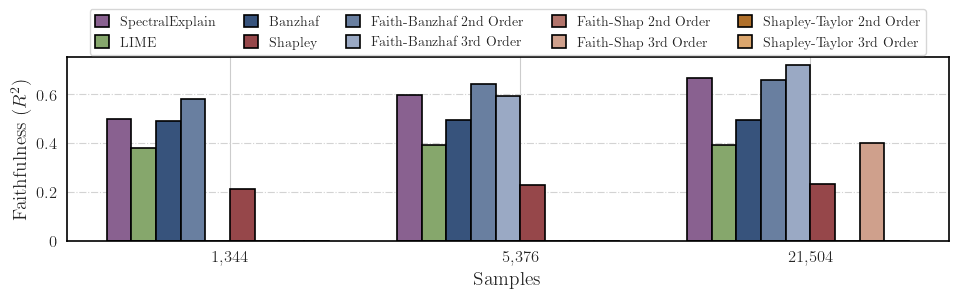

In [562]:
best_methods = ['qsft_soft_0', 'lime_0', 'faith_banzhaf_1', 'faith_banzhaf_2', 'faith_banzhaf_3', 'faith_shapley_1', 'faith_shapley_2',  'faith_shapley_3', 'shapley_taylor_2','shapley_taylor_3']
plt.clf()
method_dict = {'faith_shapley_1': 'SV_1',
               'faith_shapley_2': 'FSII_2',
               'faith_shapley_3': 'FSII_3',
               'faith_shapley_4': 'FSII_4',
               'shapley_taylor_2': 'STII_2',
               'shapley_taylor_3': 'STII_3',
               'shapley_taylor_4': 'STII_4',
               'lime_0': 'lime_1'}

fig, ax = plt.subplots(figsize=(10, 3.3))
plt.grid(True, axis='y', zorder=3, color="lightgray", linewidth="0.8", linestyle="-.")

x = np.arange(3)
width = 0.85 / len(best_methods)  # Adjust the width to fit all bars without overlap

sentiment_faithfulness_results = np.zeros((len(best_methods), 3))
for i, method in enumerate(best_methods):
    for idx_j, result in enumerate([hotpot_4_faithfulness['16-31'], hotpot_6_faithfulness['16-31'], hotpot_8_faithfulness['16-31']]):
        sentiment_faithfulness_results[i, idx_j] = result[method_dict[method] if method not in result else method]
    ax.bar(x + (i - (len(best_methods) - 1) / 2) * width, sentiment_faithfulness_results[i, :], width, color=color_dict[method], ecolor='black', edgecolor='black',linewidth=1.2, zorder=2, label=name_dict[method])

handles, labels = plt.gca().get_legend_handles_labels()
order = [0,1,2,5,3,4,6,7,8,9]
ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order],
          loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=len(best_methods)/2, fontsize=10, frameon=True, handlelength=1, handleheight=1)

for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.2)  # Optional: Adjust thickness
plt.ylim(0, .75)
plt.xlabel("Samples", fontsize=14)
plt.ylabel("Faithfulness ($R^2$)", fontsize=14)
plt.xticks(np.arange(3), ['1,344', '5,376', '21,504'], fontsize=12)
plt.yticks([0, 0.2, 0.4, 0.6], [0, 0.2, 0.4, 0.6], fontsize=12)
fig.tight_layout()
plt.savefig('hotpot_faithfulness_dynamic.pdf', dpi=400, bbox_inches='tight')
plt.show()

# Fidelity

## Sentiment Analysis

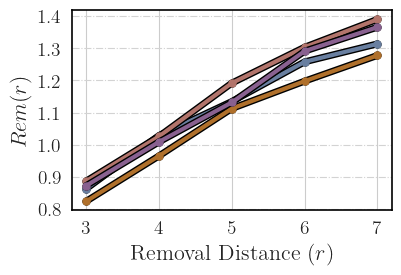

In [564]:
# Define methods and parameters
best_methods = ['qsft_hard_0', 'faith_shapley_2', 'shapley_taylor_2', 'linear_2']
subtraction_distance = 7
fig_size = (4.12, 2.85)


# Prepare the figure and axis
fig, ax = plt.subplots(figsize=fig_size)
ax.grid(True, axis='y', zorder=3, color="lightgray", linewidth="0.8", linestyle="-.")
# Loop through methods to plot bars
for i, method in enumerate(best_methods[::-1]):
    delta_results = sentiment_subtraction_results['methods'][method]['delta']
    mean_values = np.mean(delta_results[0:20, 0, 3:subtraction_distance+1], axis=0)

    # Calculate x-position for bars
    x_pos = np.arange(subtraction_distance-2)
    ax.plot(x_pos, mean_values, color='black', linewidth=5, marker='o', markersize=5)
    ax.plot(x_pos, mean_values, color=color_dict[method], linewidth=3, marker='o', markersize=5)

ax.set_xticks(range(subtraction_distance-2), range(3,subtraction_distance+1), fontsize=14)
ax.set_yticks([0.8,0.9,1.0,1.1,1.2,1.3,1.4],[0.8,0.9,1.0,1.1,1.2,1.3,1.4], fontsize=14)
ax.set_xlabel(r'Removal Distance ($r$)', fontsize=16)
ax.set_ylabel(r'$Rem(r)$', fontsize=16)
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.2)  # Optional: Adjust thickness
# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('sentiment_fidelity3_small.pdf', dpi=400, bbox_inches='tight')
plt.show()

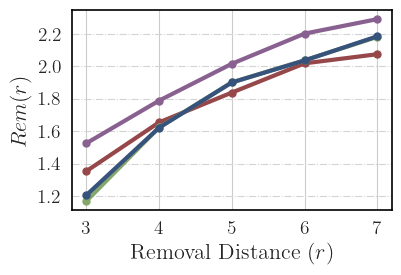

In [459]:
# Define methods and parameters
best_methods = ['qsft_hard_0', 'linear_1', 'lime_0', 'faith_shapley_1']
subtraction_distance = 7
fig_size = (4.12, 2.85)

# Prepare the figure and axis
fig, ax = plt.subplots(figsize=fig_size)
ax.grid(True, axis='y', zorder=3, color="lightgray", linewidth="0.8", linestyle="-.")
# Loop through methods to plot bars
for i, method in enumerate(best_methods[::-1]):
    delta_results = sentiment_large_subtraction_results['methods'][method]['delta']
    mean_values = np.mean(delta_results[0:20, 0, 3:subtraction_distance+1], axis=0)


    # Calculate x-position for bars
    x_pos = np.arange(subtraction_distance-2)
    ax.plot(x_pos, mean_values, color=color_dict[method], linewidth=3, marker='o', markersize=5)

ax.set_xticks(range(subtraction_distance-2), range(3,subtraction_distance+1), fontsize=14)
ax.set_yticks([1.2,1.4,1.6,1.8,2.0,2.2],[1.2,1.4,1.6,1.8,2.0,2.2], fontsize=14)
ax.set_xlabel(r'Removal Distance ($r$)', fontsize=16)
ax.set_ylabel(r'$Rem(r)$', fontsize=16)
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.2)  # Optional: Adjust thickness
# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('sentiment_fidelity3_large.pdf', dpi=400, bbox_inches='tight')
plt.show()

In [460]:
# pickle load file into dict
with open('../results/drop_subtract_range(32,63).pkl', 'rb') as f:
    drop_1_subtract = pickle.load(f)

with open('../results/drop_subtract_range(64,127).pkl', 'rb') as f:
    drop_2_subtract = pickle.load(f)

with open('../results/drop_subtract_range(128,255).pkl', 'rb') as f:
    drop_3_subtract = pickle.load(f)

drop_colors = {'qsft_soft_0': '#896190',
               'FSII_2': '#B2746B',
               'STII_2': '#b0702b',
               'lime_1': '#86a76c',
               'SV_1': '#96474A',
               'faith_banzhaf_1': '#37537c',
               'faith_banzhaf_2': '#697fa0',}

In [461]:
drop_3_subtract.keys()

dict_keys(['qsft_soft_0', 'lime_1', 'SV_1', 'faith_banzhaf_1'])

faith_banzhaf_2
STII_2
FSII_2
qsft_soft_0


<Figure size 640x480 with 0 Axes>

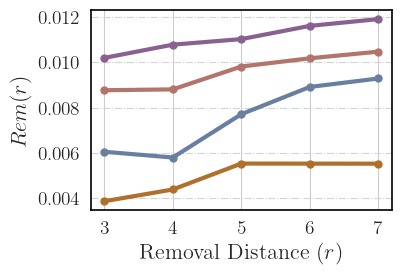

In [462]:
plt.clf()
fig_size = (4.12, 2.85)
fig, ax = plt.subplots(figsize=fig_size)
ax.grid(True, axis='y', zorder=3, color="lightgray", linewidth="0.8", linestyle="-.")
x_pos = np.arange(5)
for method in ['qsft_soft_0', 'FSII_2', 'STII_2', 'faith_banzhaf_2'][::-1]:
    print(method)
    ax.plot(x_pos, drop_1_subtract[method], color=drop_colors[method], linewidth=3, marker='o', markersize=5, label=method)
ax.set_xticks(range(subtraction_distance-2), range(3,subtraction_distance+1), fontsize=14)
ax.set_yticks([0.004, 0.006, 0.008, 0.010, 0.012], ["0.004", "0.006", "0.008", "0.010", "0.012"], fontsize=14)
ax.set_xlabel(r'Removal Distance ($r$)', fontsize=16)
ax.set_ylabel(r'$Rem(r)$', fontsize=16)
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.2)  # Optional: Adjust thickness
plt.tight_layout()
plt.savefig('drop_fidelity_small.pdf', dpi=400, bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>

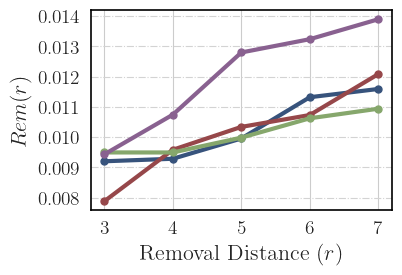

In [463]:
plt.clf()
fig_size = (4.12, 2.85)
fig, ax = plt.subplots(figsize=fig_size)
ax.grid(True, axis='y', zorder=3, color="lightgray", linewidth="0.8", linestyle="-.")
x_pos = np.arange(5)
for method in list(drop_2_subtract.keys())[::-1]:
    ax.plot(x_pos, drop_2_subtract[method], color=drop_colors[method], linewidth=3, marker='o', markersize=5, label=method)
ax.set_xticks(range(subtraction_distance-2), range(3,subtraction_distance+1), fontsize=14)
ax.set_yticks([0.008, 0.009, 0.010, 0.011, 0.012, 0.013, 0.014], ["0.008", "0.009", "0.010", "0.011", "0.012", "0.013", "0.014"],fontsize=14)
ax.set_xlabel(r'Removal Distance ($r$)', fontsize=16)
ax.set_ylabel(r'$Rem(r)$', fontsize=16)
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.2)  # Optional: Adjust thickness
plt.tight_layout()
plt.savefig('drop_fidelity_large.pdf', dpi=400, bbox_inches='tight')
plt.show()

In [464]:
# pickle load file into dict
with open('../results/hotpotqa_subtract_range(32,63).pkl', 'rb') as f:
    hotpot_1_subtract = pickle.load(f)

with open('../results/hotpotqa_subtract_range(64,127).pkl', 'rb') as f:
    hotpot_2_subtract = pickle.load(f)

hotpot_colors = {'qsft_soft_0': '#896190',
               'FSII_2': '#B2746B',
               'STII_2': '#b0702b',
               'lime_1': '#86a76c',
               'SV_1': '#96474A'}

In [465]:
hotpot_1_subtract.keys()

dict_keys(['qsft_soft_0', 'lime_1', 'FSII_2', 'faith_banzhaf_2', 'SV_1', 'faith_banzhaf_1'])

<Figure size 640x480 with 0 Axes>

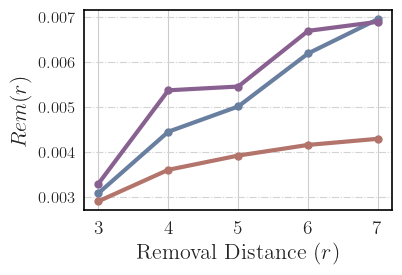

In [469]:
plt.clf()
fig_size = (4.12, 2.85)
fig, ax = plt.subplots(figsize=fig_size)
ax.grid(True, axis='y', zorder=3, color="lightgray", linewidth="0.8", linestyle="-.")
x_pos = np.arange(5)
for method in ['qsft_soft_0', 'FSII_2', 'faith_banzhaf_2'][::-1]:
    ax.plot(x_pos, hotpot_1_subtract[method], color=drop_colors[method], linewidth=3, marker='o', markersize=5, label=method)
ax.set_yticks([0.003, 0.004, 0.005, 0.006, 0.007], ['0.003', '0.004', '0.005','0.006', '0.007'], fontsize=12)
ax.set_xticks(range(subtraction_distance-2), range(3,subtraction_distance+1), fontsize=14)
ax.set_xlabel(r'Removal Distance ($r$)', fontsize=16)
ax.set_ylabel(r'$Rem(r)$', fontsize=16)
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.2)  # Optional: Adjust thickness
plt.tight_layout()
plt.savefig('hotpot_fidelity_small.pdf', dpi=400, bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>

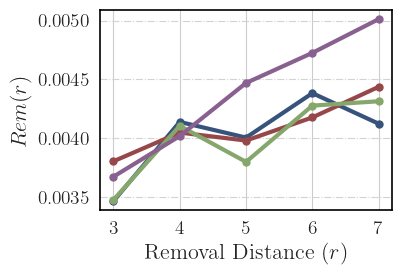

In [482]:
plt.clf()
fig_size = (4.12, 2.85)
fig, ax = plt.subplots(figsize=fig_size)
ax.grid(True, axis='y', zorder=3, color="lightgray", linewidth="0.8", linestyle="-.")
x_pos = np.arange(5)
for method in list(hotpot_2_subtract.keys())[::-1]:
    ax.plot(x_pos, hotpot_2_subtract[method], color=drop_colors[method], linewidth=3, marker='o', markersize=5, label=method)
ax.set_yticks([0.00350, 0.00400, 0.00450, 0.00500], ["0.0035","0.0040",  "0.0045","0.0050"], fontsize=14)
ax.set_xticks(range(subtraction_distance-2), range(3,subtraction_distance+1), fontsize=14)
ax.set_xlabel(r'Removal Distance ($r$)', fontsize=16)
ax.set_ylabel(r'$Rem(r)$', fontsize=16)
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.2)  # Optional: Adjust thickness
plt.tight_layout()
plt.savefig('hotpot_fidelity_large.pdf', dpi=400, bbox_inches='tight')
plt.show()

# Recall

## Sentiment Analysis

In [483]:
sentiment_recall_results['methods']['Regression']['recall_k'].shape

(20, 6, 5)

<Figure size 640x480 with 0 Axes>

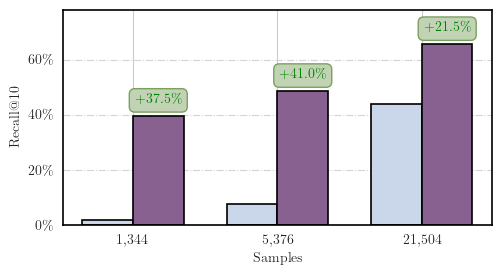

In [484]:
plt.clf()
# Plotting each type of data
fig, ax = plt.subplots(figsize=(5.12, 2.85))
plt.grid(True, axis='y', zorder=3, color = "lightgray", linewidth = "0.8", linestyle = "-.")
# Bar plot settings
x = np.arange(3)  # the label locations
width = 0.35  # the width of the bars

mean_regression = np.mean(sentiment_recall_results['methods']['Regression']['recall_k'][:,:,1], axis=0)[1::2]
ax.bar(x + -0.5 * width, mean_regression, width, color='#CAD6E9', ecolor='black', edgecolor='black',
       linewidth=1.2, zorder=2)

mean_se = np.mean(sentiment_recall_results['methods']['SpectralExplainSoft']['recall_k'][:,:,1], axis=0)[1::2]
ax.bar(x + 0.5 * width, mean_se, width, label='SpectralExplain\nSoft', color="#896190", ecolor='black', edgecolor='black',
       linewidth=1.2, zorder=2)
for j in range(3):
    ax.text(j + (width / 2), mean_se[j] + 0.035, f"+{100*(mean_se[j] - mean_regression[j]):.1f}\%",
        ha='center', va='bottom', fontsize=10, color='green', bbox=dict(facecolor='#c2d3b5', edgecolor='#7aa05e', boxstyle='round,pad=0.4'))

plt.ylim(0,0.78)
plt.xlabel("Samples")
plt.ylabel("Recall@10")
plt.xticks(range(3), [f"{s:,}" for s in [1344, 5376, 21504]])
plt.yticks([0,0.2,0.4,0.6], ["0\%","20\%","40\%","60\%"])
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.2)  # Optional: Adjust thickness
plt.tight_layout()
plt.savefig('sentiment_recall.pdf', dpi=400, bbox_inches='tight')
plt.show()

In [485]:
with open('../results/hotpotqa_recall_results.pkl', 'rb') as f:
    hotpot_recall_results = pickle.load(f)

In [486]:
hotpot_recall_results

{'qsft_soft_0': [0.2196428571428572, 0.25773809523809527, 0.24678571428571433],
 'FSII_3': [0.1464285714285714, 0.19642857142857142, 0.19761904761904758],
 'faith_banzhaf_3': [0.13214285714285715,
  0.16547619047619047,
  0.18452380952380953]}

<Figure size 640x480 with 0 Axes>

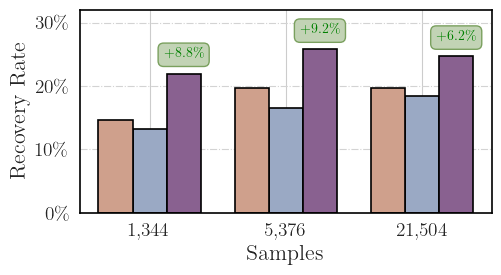

In [489]:
plt.clf()
# Plotting each type of data
fig, ax = plt.subplots(figsize=(5.12, 2.85))
plt.grid(True, axis='y', zorder=3, color = "lightgray", linewidth = "0.8", linestyle = "-.")
# Bar plot settings
x = np.arange(3)  # the label locations
width = 0.25  # the width of the bars

ax.bar(x, hotpot_recall_results['faith_banzhaf_3'], width, color=color_dict['faith_banzhaf_3'], ecolor='black', edgecolor='black',
       linewidth=1.2, zorder=2)


ax.bar(x-width, hotpot_recall_results['FSII_3'], width, label='SpectralExplain\nSoft', color=color_dict['faith_shapley_3'], ecolor='black', edgecolor='black',linewidth=1.2, zorder=2)

ax.bar(x+width, hotpot_recall_results['qsft_soft_0'], width, label='SpectralExplain\nSoft', color=color_dict['qsft_soft_0'], ecolor='black', edgecolor='black',linewidth=1.2, zorder=2)


for j in range(3):
    ax.text(j + width, hotpot_recall_results['qsft_soft_0'][j] + 0.02, f"+{100*(hotpot_recall_results['qsft_soft_0'][j] - hotpot_recall_results['faith_banzhaf_3'][j]):.1f}\%",
        ha='center', va='bottom', fontsize=10, color='green', bbox=dict(facecolor='#c2d3b5', edgecolor='#7aa05e', boxstyle='round,pad=0.4'))


plt.ylim(0,0.32)
plt.xlabel("Samples", fontsize=16)
plt.ylabel("Recovery Rate", fontsize=16)
plt.xticks(range(3), [f"{s:,}" for s in [1344, 5376, 21504]], fontsize=14)
plt.yticks([0,0.1,0.2,0.3], ["0\%","10\%","20\%","30\%"], fontsize=14)
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.2)  # Optional: Adjust thickness
plt.tight_layout()
plt.savefig('hotpot_recall.pdf', dpi=400, bbox_inches='tight')
plt.show()

In [338]:
color_dict['faith_banzhaf_3']

'#9aa9c4'